In [ ]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

# our library
from sat_metropolis import mcmc, models

In [2]:
# experiment setup
num_con = 7
reduction_factor = 4
max_int_bv = 2**6-1
 
## Get models
(s, num_vars) = models.get_roads_smt(max_int = max_int_bv, 
                                     num_con=num_con,
                                     y_reduction_factor=reduction_factor)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]


In [3]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='megasampler', z3_problem=s, timeout_sampler=60*10)

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 63
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 28
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler
Formula is satisfiable
---------SOLVING STATISTICS--------
do_epoch time: 195.408
epoch time: 417.515
grow_seed time: 8.72874
initial_solving time: 0.0212993
output time: 0.211325
start_epoch time: 222.089
total time: 417.563
Epochs: 12415
MAX-SMT calls: 12416
SMT calls: 0
Assignments considered (with repetitions): 1266229
Models (with repetitions): 1266229
Unique models (# samples in file): 10000
-----------------------------------


/home/pardo/programs/miniconda3/envs/mcmc_sat/lib/python3.12/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (28), generating only 20 plots
  warnings.warn(


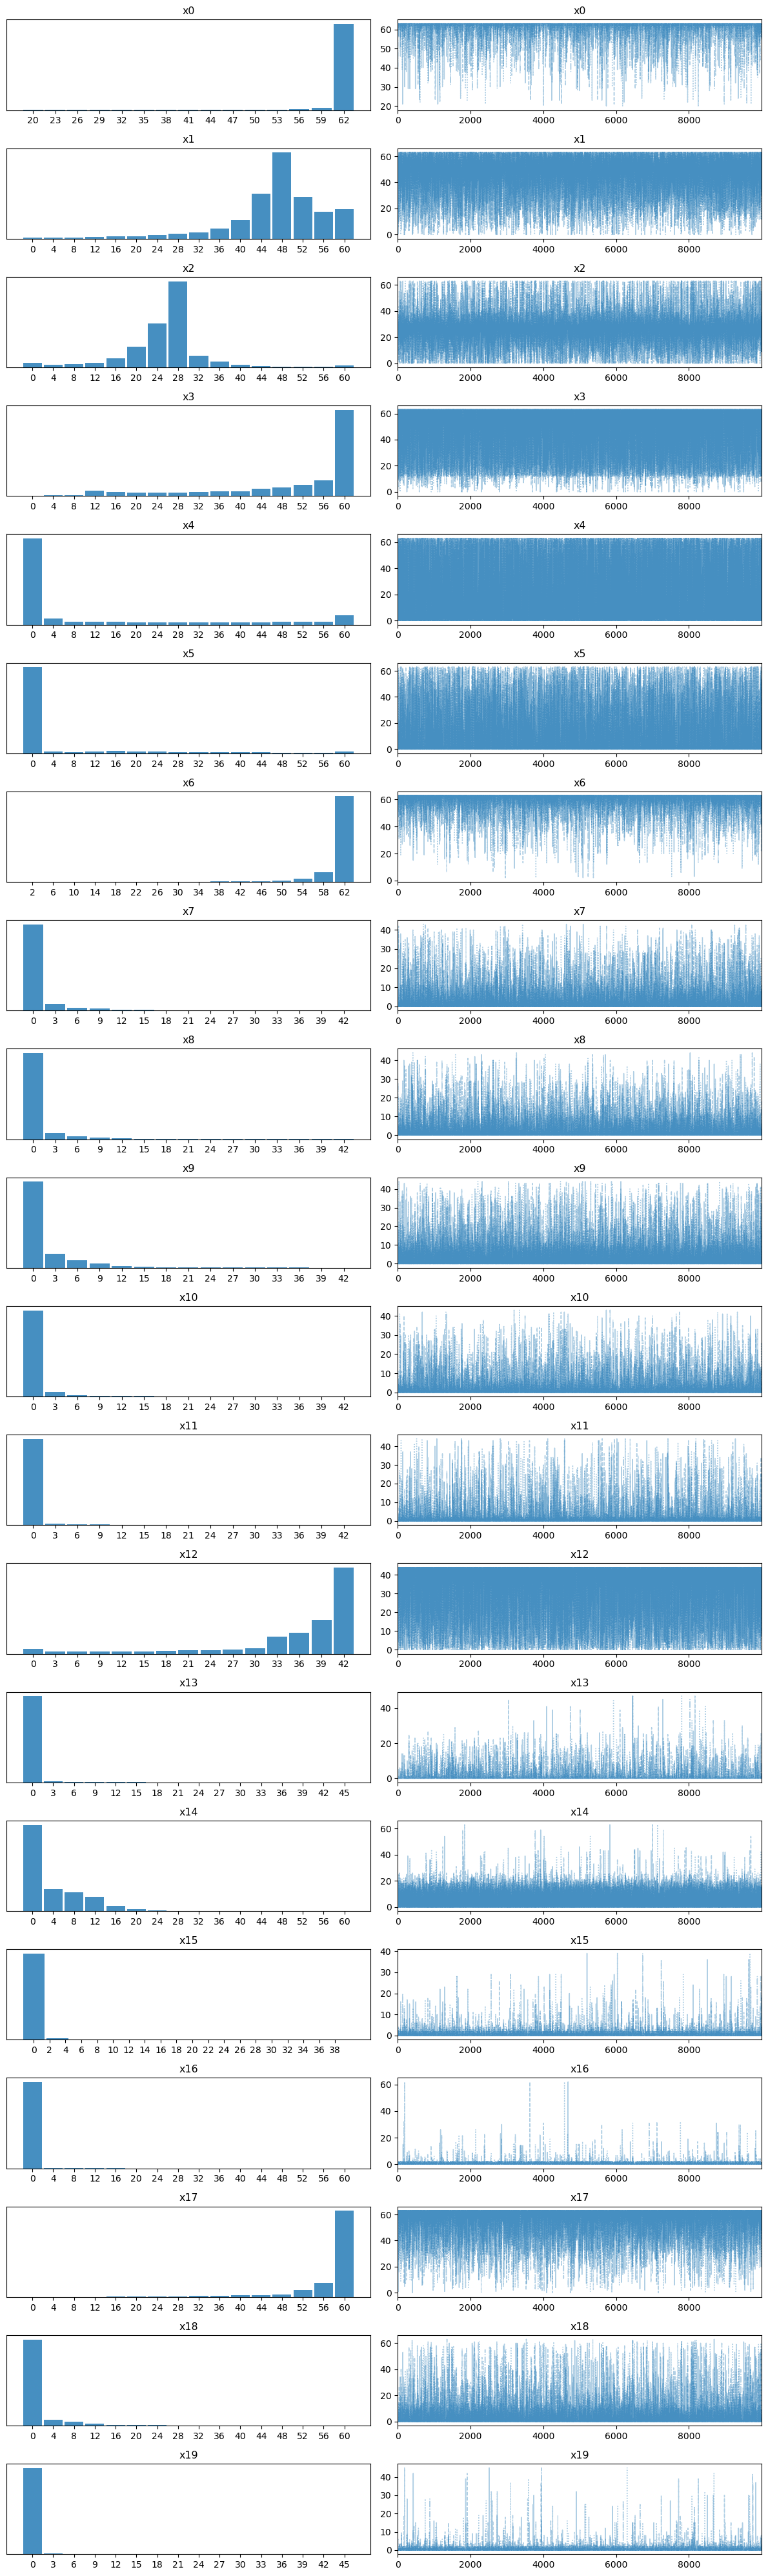

In [4]:
# Plot the posterior
import matplotlib.pyplot as plt
az.plot_trace(trace);
plt.savefig('megasampler_trace_plot.png', dpi=150);

In [5]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,62.466,2.885,62.0,63.0,0.014,0.010,39758.0,40000.0,1.0
x1,48.092,10.221,30.0,63.0,0.051,0.036,39953.0,40000.0,1.0
x2,26.812,8.330,5.0,40.0,0.041,0.029,40094.0,39896.0,1.0
x3,52.189,15.173,18.0,63.0,0.077,0.055,38741.0,39212.0,1.0
x4,13.514,20.544,0.0,61.0,0.103,0.073,39551.0,39312.0,1.0
x5,6.298,13.314,0.0,37.0,0.066,0.047,40393.0,39875.0,1.0
x6,61.630,4.575,57.0,63.0,0.023,0.016,40039.0,40000.0,1.0
x7,1.496,4.366,0.0,8.0,0.022,0.016,39732.0,39200.0,1.0
x8,1.391,4.103,0.0,7.0,0.021,0.015,39550.0,38958.0,1.0
x9,2.495,5.147,0.0,10.0,0.026,0.018,39312.0,37879.0,1.0
